<a href="https://colab.research.google.com/github/Marel88/Bioinfo_7_1/blob/master/Bio_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install py_wsi --no-index --find-links file:///Users/Mac/Desktop/py-wsi-1.1.zip
!apt install openslide-tool
!pip install openslide-python

#SCRIPT FOR IMAGE CROPPING


import py_wsi
import py_wsi.imagepy_toolkit as tk
from py_wsi import turtle

file_dir = "/Users/Mac/Desktop/ROI-dataset-bioinf/Training/Healthy/"
db_location = "/Users/Mac/Desktop/ROI-dataset-bioinf/Training/Healthy_patches/"
xml_dir = file_dir
patch_size = 64
level = 10
db_name = ""
overlap = 0

# All possible labels mapped to integer ids in order of increasing severity.
label_map = {}

turtle = turtle.Turtle(file_dir, db_location, db_name, xml_dir=xml_dir, label_map=label_map, storage_type='disk')
turtle.sample_and_store_patches(patch_size, level, overlap, load_xml=False, limit_bounds=True)


In [0]:
#CNN BASE MODEL - DATA LOADING

import numpy as np
!pip3 install keras
!pip3 install tensorflow==1.5.0
!pip install mxnet-mkl
!pip3 install sklearn
!pip3 install keras_tqdm
!pip install scipy
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import *
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train_path="/Users/Mac/Desktop/ROI-dataset-bioinf/Training/Patches/"
valid_path="/Users/Mac/Desktop/ROI-dataset-bioinf/Validation/Patches"
test_path ="/Users/Mac/Desktop/ROI-dataset-bioinf/Test/Patches"

In [10]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(64,64), classes=['Benign', 'Healthy', 'Cancer'], batch_size=100)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(64,64), classes=['Benign', 'Healthy', 'Cancer'], batch_size=100)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(64,64), classes=['Benign', 'Healthy', 'Cancer'], batch_size=100)

Found 4084 images belonging to 3 classes.
Found 1843 images belonging to 3 classes.
Found 890 images belonging to 3 classes.


In [0]:
#For plotting images with labels
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


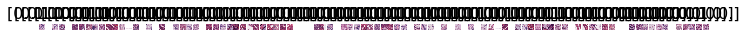

In [12]:
imgs, labels = next(train_batches)

plots(imgs,titles=labels)

In [13]:
#CNN MODEL BUILDING
model = Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)), Flatten(), Dense(3, activation='softmax'),])
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(train_batches, steps_per_epoch=22, validation_data=valid_batches, validation_steps=22, epochs=5, verbose=2)


Epoch 1/5
 - 55s - loss: 11.8127 - acc: 0.2641 - val_loss: 12.8990 - val_acc: 0.1997
Epoch 2/5
 - 50s - loss: 11.9480 - acc: 0.2587 - val_loss: 13.0269 - val_acc: 0.1918
Epoch 3/5
 - 51s - loss: 11.7955 - acc: 0.2682 - val_loss: 12.9592 - val_acc: 0.1960
Epoch 4/5
 - 57s - loss: 11.8615 - acc: 0.2641 - val_loss: 13.0193 - val_acc: 0.1923
Epoch 5/5
 - 37s - loss: 11.8322 - acc: 0.2659 - val_loss: 12.9667 - val_acc: 0.1955


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

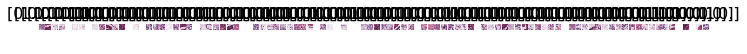

In [14]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles = test_labels)
#test_labels = test_labels[:,0]
test_labels

In [0]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [16]:
predictions

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [33]:
!pip3 install -U scikit-learn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, predictions)

Requirement already up-to-date: scikit-learn in /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages (0.20.3)


ValueError: ignored

In [0]:
#MULTI-LABEL CONFUSION MATRIX

y_test_non_category = [ np.argmax(t) for t in test_labels ]
y_predict_non_category = [ np.argmax(t) for t in predictions ]

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test_non_category, y_predict_non_category)

In [0]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):

#This function prints and plots the confusion matrix.
#Normalization can ben applied by setting 'normalize-True'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[20  0  0]
 [63  0  0]
 [17  0  0]]


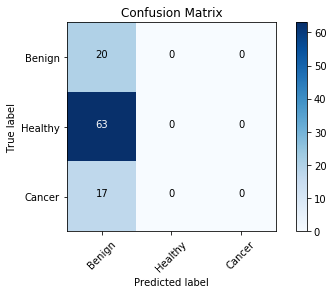

In [44]:
cm_plot_labels = ['Benign','Healthy','Cancer']
plot_confusion_matrix(conf_mat, cm_plot_labels,title ='Confusion Matrix')

**FIN QUI TUTTO OK, IL MODELLO FA SCHIFO MA TECNICAMENTE FA QUELLO CHE DEVE FARE, SE LA CONFUSION MATRIX È GIUSTA, HO TROVATO COME PLOTTARLA CON UN MODELLO A MULTI LABEL**

In [0]:
#FINE TUNING OF A PRE-TRAINED MODEL (VGG16)